# COGS 108: Final Project

## Group Members: Fill in the Student ID's of each group member here
    A11687994 - Henry Huynh
    A14235192 - Pardeep Singh
    A12105649 - Omer Usmami

# Part 1: Data Import and Data Cleaning
We are going to be incorporating three different json data files, representing three different basketball season, which include all of his shots for the season ( make,miss,shot type, etc...)

Since were only interested in his shots beyond the three point line, we  will have to manipulate the data set to exclude all shots below the three point line.


In [1]:
%matplotlib inline
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import json
import csv

In [2]:
# Load the json file into a  pandas dataframe.

# Traditional method from assignments did not work, did what this link has
# instead.

# https://stackoverflow.com/questions/42705228/how-to-read-these-json-files

with open('shotchartdetail2014-2015.json') as data_file:
   shot_attempts = data_file.read()    
   try:
       shot_data = json.loads(shot_attempts)
   except ValueError:
       print('Failed:')  
        
##with open('shotchartdetail2015-2016.json') as data_file:
   ##shot_attempts = data_file.read()    
   ##try:
      ## shot_data2 = json.loads(shot_attempts)
##   except ValueError
##       print('Failed:')      

In [3]:
# Get the headers so we can use them as column headers for the Data Frame
headers = shot_data['resultSets'][0]['headers']

# Get shot chart data
shots = shot_data['resultSets'][0]['rowSet']

#print(headers)
#print(shots)

In [4]:
# Add 'shots' to our DataFrame
df_shots = pd.DataFrame(shots, columns=headers)

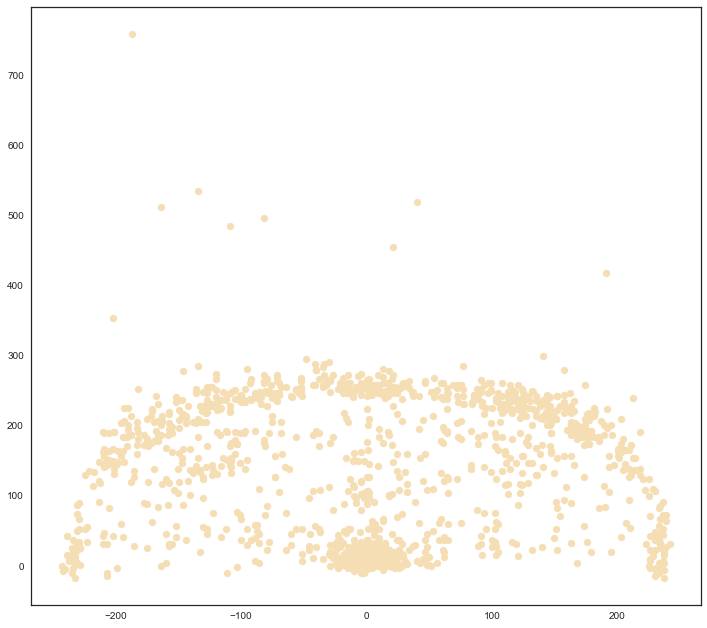

In [5]:
sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(12,11))
plt.scatter(df_shots.LOC_X, df_shots.LOC_Y, color='wheat')
plt.show()

# Part 2: Visualization: Shot Charts and Effiency 
In this section, we will create a visual representation of a baskebtball court, which will layout all of our data of interest. This will also heavily involve the use of heatmaps, to establish the density of Stephen Curry's 3 point shots, to help us determine his overall efficency.

### Function to make the visual representation of the basketball court

In [6]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='white', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()
        ax.set_facecolor('darkblue')

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color, fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    #inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180, linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,  color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw, color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0, linewidth=lw, color=color)
    
    # Wings
    wing_one = Rectangle((249, 142.5), -170, 280, linewidth=lw, color='red', fill=False, linestyle='dashed')
    wing_two = Rectangle((-248, 142.5), 170, 280, linewidth=lw, color='red', fill=False, linestyle='dashed')

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, top_free_throw, bottom_free_throw,corner_three_a,
                      restricted,corner_three_b, three_arc, outer_box, wing_one, wing_two]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

### Basketball court with all the shots including both 3 pointers and 2 pointers

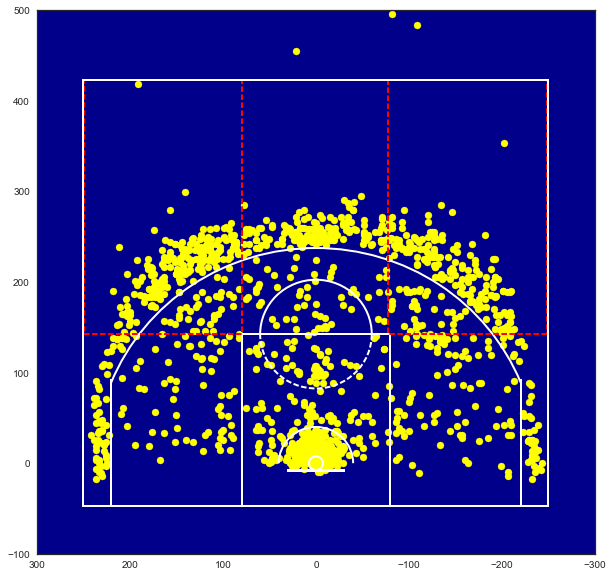

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(df_shots.LOC_X, df_shots.LOC_Y, color='yellow')
draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(300,-300)
plt.ylim(-100, 500)
plt.show()

### Find the Field Goal Percentage of all 3 pointers with some data cleaning

In [8]:
#To see what the data looked like before some cleaning and dropping unnecessary columns
df_shots

GRID_TYPE     GAME_ID  GAME_EVENT_ID  PLAYER_ID    PLAYER_NAME  \
0     Shot Chart Detail  0021400014             50     201939  Stephen Curry   
1     Shot Chart Detail  0021400014             74     201939  Stephen Curry   
2     Shot Chart Detail  0021400014            176     201939  Stephen Curry   
3     Shot Chart Detail  0021400014            205     201939  Stephen Curry   
4     Shot Chart Detail  0021400014            227     201939  Stephen Curry   
5     Shot Chart Detail  0021400014            238     201939  Stephen Curry   
6     Shot Chart Detail  0021400014            305     201939  Stephen Curry   
7     Shot Chart Detail  0021400014            349     201939  Stephen Curry   
8     Shot Chart Detail  0021400014            378     201939  Stephen Curry   
9     Shot Chart Detail  0021400014            431     201939  Stephen Curry   
10    Shot Chart Detail  0021400014            454     201939  Stephen Curry   
11    Shot Chart Detail  0021400014            492     201939  Stephen Curry   
12    Shot Chart Detail  0021400014            566     201939  Stephen Curry   
13    Shot Chart Detail  0021400014            588     201939  Stephen Curry   
14    Shot Chart Detail  0021400014            599     201939  Stephen Curry   
15    Shot Chart Detail  0021400014            605     201939  Stephen Curry   
16    Shot Chart Detail  0021400014            615     201939  Stephen Curry   
17    Shot Chart Detail  0021400038              8     201939  Stephen Curry   
18    Shot Chart Detail  0021400038             41     201939  Stephen Curry   
19    Shot Chart Detail  0021400038             47     201939  Stephen Curry   
20    Shot Chart Detail  0021400038             50     201939  Stephen Curry   
21    Shot Chart Detail  0021400038             62     201939  Stephen Curry   
22    Shot Chart Detail  0021400038             77     201939  Stephen Curry   
23    Shot Chart Detail  0021400038             79     201939  Stephen Curry   
24    Shot Chart Detail  0021400038             88     201939  Stephen Curry   
25    Shot Chart Detail  0021400038             94     201939  Stephen Curry   
26    Shot Chart Detail  0021400038            212     201939  Stephen Curry   
27    Shot Chart Detail  0021400038            253     201939  Stephen Curry   
28    Shot Chart Detail  0021400038            290     201939  Stephen Curry   
29    Shot Chart Detail  0021400038            321     201939  Stephen Curry   
...                 ...         ...            ...        ...            ...   
1311  Shot Chart Detail  0021401192            303     201939  Stephen Curry   
1312  Shot Chart Detail  0021401192            392     201939  Stephen Curry   
1313  Shot Chart Detail  0021401192            348     201939  Stephen Curry   
1314  Shot Chart Detail  0021401192            365     201939  Stephen Curry   
1315  Shot Chart Detail  0021401192            381     201939  Stephen Curry   
1316  Shot Chart Detail  0021401192            389     201939  Stephen Curry   
1317  Shot Chart Detail  0021401192            460     201939  Stephen Curry   
1318  Shot Chart Detail  0021401192            467     201939  Stephen Curry   
1319  Shot Chart Detail  0021401192            485     201939  Stephen Curry   
1320  Shot Chart Detail  0021401192            503     201939  Stephen Curry   
1321  Shot Chart Detail  0021401212             23     201939  Stephen Curry   
1322  Shot Chart Detail  0021401212             33     201939  Stephen Curry   
1323  Shot Chart Detail  0021401212             39     201939  Stephen Curry   
1324  Shot Chart Detail  0021401212             41     201939  Stephen Curry   
1325  Shot Chart Detail  0021401212             50     201939  Stephen Curry   
1326  Shot Chart Detail  0021401212             78     201939  Stephen Curry   
1327  Shot Chart Detail  0021401212            248     201939  Stephen Curry   
1328  Shot Chart Detail  0021401212            316     201939  Stephen Curry   
1329  Shot Cha

In [9]:
#drop some columns to make data easier to look at
df_shots.drop(['GRID_TYPE','GAME_ID','GAME_EVENT_ID','PLAYER_ID','PLAYER_NAME','TEAM_ID','TEAM_NAME','PERIOD','MINUTES_REMAINING','SECONDS_REMAINING','HTM','VTM','ACTION_TYPE','GAME_DATE'], axis=1, inplace=True)
df_shots

EVENT_TYPE       SHOT_TYPE        SHOT_ZONE_BASIC  \
0       Made Shot  2PT Field Goal              Mid-Range   
1     Missed Shot  3PT Field Goal      Above the Break 3   
2       Made Shot  2PT Field Goal        Restricted Area   
3       Made Shot  2PT Field Goal        Restricted Area   
4     Missed Shot  3PT Field Goal      Above the Break 3   
5     Missed Shot  2PT Field Goal  In The Paint (Non-RA)   
6     Missed Shot  2PT Field Goal  In The Paint (Non-RA)   
7     Missed Shot  3PT Field Goal          Left Corner 3   
8     Missed Shot  3PT Field Goal      Above the Break 3   
9       Made Shot  3PT Field Goal      Above the Break 3   
10    Missed Shot  2PT Field Goal        Restricted Area   
11    Missed Shot  3PT Field Goal      Above the Break 3   
12      Made Shot  2PT Field Goal  In The Paint (Non-RA)   
13      Made Shot  2PT Field Goal        Restricted Area   
14    Missed Shot  3PT Field Goal      Above the Break 3   
15      Made Shot  3PT Field Goal      Above the Break 3   
16    Missed Shot  3PT Field Goal      Above the Break 3   
17    Missed Shot  2PT Field Goal  In The Paint (Non-RA)   
18      Made Shot  2PT Field Goal              Mid-Range   
19    Missed Shot  3PT Field Goal      Above the Break 3   
20    Missed Shot  2PT Field Goal  In The Paint (Non-RA)   
21      Made Shot  3PT Field Goal      Above the Break 3   
22      Made Shot  2PT Field Goal              Mid-Range   
23      Made Shot  2PT Field Goal  In The Paint (Non-RA)   
24      Made Shot  3PT Field Goal      Above the Break 3   
25    Missed Shot  3PT Field Goal      Above the Break 3   
26      Made Shot  2PT Field Goal  In The Paint (Non-RA)   
27    Missed Shot  2PT Field Goal              Mid-Range   
28    Missed Shot  3PT Field Goal      Above the Break 3   
29    Missed Shot  2PT Field Goal        Restricted Area   
...           ...             ...                    ...   
1311  Missed Shot  3PT Field Goal      Above the Break 3   
1312  Missed Shot  2PT Field Goal        Restricted Area   
1313  Missed Shot  3PT Field Goal         Right Corner 3   
1314    Made Shot  2PT Field Goal        Restricted Area   
1315  Missed Shot  2PT Field Goal  In The Paint (Non-RA)   
1316    Made Shot  3PT Field Goal      Above the Break 3   
1317    Made Shot  2PT Field Goal  In The Paint (Non-RA)   
1318  Missed Shot  3PT Field Goal      Above the Break 3   
1319    Made Shot  2PT Field Goal        Restricted Area   
1320  Missed Shot  3PT Field Goal      Above the Break 3   
1321    Made Shot  2PT Field Goal              Mid-Range   
1322    Made Shot  2PT Field Goal        Restricted Area   
1323    Made Shot  3PT Field Goal      Above the Break 3   
1324    Made Shot  2PT Field Goal              Mid-Range   
1325  Missed Shot  3PT Field Goal      Above the Break 3   
1326  Missed Shot  2PT Field Goal              Mid-Range   
1327    Made Shot  3PT Field Goal      Above the Break 3   
1328  Missed Shot  3PT Field Goal      Above the Break 3   
1329    Made Shot  3PT Field Goal      Above the Break 3   
1330  Missed Shot  3PT Field Goal              Backcourt   
1331  Missed Shot  2PT Field Goal  In The Paint (Non-RA)   
1332    Made Shot  2PT Field Goal  In The Paint (Non-RA)   
1333  Missed Shot  2PT Field Goal              Mid-Range   
1334  Missed Shot  3PT Field Goal      Above the Break 3   
1335    Made Shot  3PT Field Goal      Above the Break 3   
1336    Made Shot  2PT Field Goal        Restricted Area   
1337  Missed Shot  2PT Field Goal              Mid-Range   
1338  Missed Shot  3PT Field Goal      Above the Break 3   
1339  Missed Shot  2PT Field Goal              Mid-Range   
1340    Made Shot  3PT Field Goal      Above the Break 3   

             SHOT_ZONE_AREA  SHOT_ZONE_RANGE  SHOT_DISTANCE  LOC_X  LOC_Y  \
0              Left Side(L)         8-16 ft.             10    -81     72   
1                 Center(C)          24+ ft.             25     65    246   
2                 Center(C)  Less Than 8 ft.           

#### Find the field goal percentage from beyond the 3 point line

In [10]:
#used to get all the shots beyond the 3 point line
threept = df_shots[df_shots['SHOT_TYPE'] == '3PT Field Goal']

#find the total number for 3pts attempted
shots_attempted = threept[threept['SHOT_ATTEMPTED_FLAG']]
totalshots = shots_attempted.count().max()

#drop the missed shots from total 3 pts attempted
made_shots = threept[threept['EVENT_TYPE'] == 'Made Shot']

#find total number of made shots
made_attempted = made_shots[made_shots['SHOT_ATTEMPTED_FLAG']]
totalmade = made_attempted.count().max()

#find the fg percentage of made shots
fgpercentage = totalmade / totalshots

fgpercentage * 100

44.27244582043344

### Make zones for the court

In [11]:
#isolate each zones of the court
leftcolumn = threept[threept['LOC_X'] >= 79]
rightcolumn = threept[threept['LOC_X'] <= -79]
centercolumn = threept[threept['LOC_X'] <= 79]

upper = threept[threept['LOC_Y'] >= 142.5]

leftwing = leftcolumn[leftcolumn['LOC_Y'] >= 142.5]
rightwing = rightcolumn[rightcolumn['LOC_Y'] >= 142.5]
center = centercolumn[centercolumn['LOC_X'] >= -79]
leftcorner = leftcolumn[leftcolumn['LOC_Y'] <= 142.5]
rightcorner = rightcolumn[rightcolumn['LOC_Y'] <= 142.5]

### Plot all miss and made shots from the 3pointer

In [12]:
#find the miss shots
miss_shots = threept[threept['EVENT_TYPE'] == 'Missed Shot']

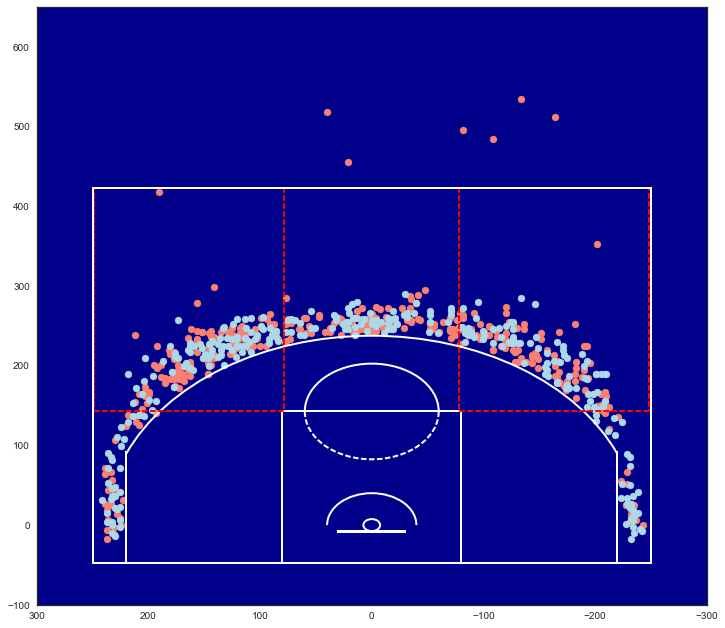

In [13]:
plt.figure(figsize=(12,11))
plt.scatter(miss_shots.LOC_X, miss_shots.LOC_Y, color='Salmon')
plt.scatter(made_shots.LOC_X, made_shots.LOC_Y, color='#add8e6')
draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(300,-300)
plt.ylim(-100,650)
plt.show()

### FG Perentage for Center

In [14]:

#CENTER
#find the total 3pt shots attempted at the right wing
centeratt = center[center['SHOT_ATTEMPTED_FLAG']]
centershots = centeratt.count().max()
#drop the miss shots from the total 3 pts attempted
centermade = center[center['EVENT_TYPE'] == 'Made Shot']
#find the total number of made shots from the right wing
centerattempted = centermade[centermade['SHOT_ATTEMPTED_FLAG']]
centermade = centerattempted.count().max()
#find the fg percentage from the right wing
centerpercentage = centermade / centershots
centerpercentage * 100

40.490797546012267

### FG Percentage for RIGHT WING

In [15]:
#RIGHT WING
#find the total 3pt shots attempted at the right wing
rtwingatt = rightwing[rightwing['SHOT_ATTEMPTED_FLAG']]
rtwingshots = rtwingatt.count().max()
#drop the miss shots from the total 3 pts attempted
rtwingmade = rightwing[rightwing['EVENT_TYPE'] == 'Made Shot']
#find the total number of made shots from the right wing
rtwingattempted = rtwingmade[rtwingmade['SHOT_ATTEMPTED_FLAG']]
rtwingmade = rtwingattempted.count().max()
#find the fg percentage from the right wing
rtwingpercentage = rtwingmade / rtwingshots
rtwingpercentage * 100

41.573033707865171

### FG Percentage for LEFT WING

In [16]:
#LEFT WING
#find the total 3pt shots attempted at the right wing
ltwingatt = leftwing[leftwing['SHOT_ATTEMPTED_FLAG']]
ltwingshots = ltwingatt.count().max()
#drop the miss shots from the total 3 pts attempted
ltwingmade = leftwing[leftwing['EVENT_TYPE'] == 'Made Shot']
#find the total number of made shots from the right wing
ltwingattempted = ltwingmade[ltwingmade['SHOT_ATTEMPTED_FLAG']]
ltwingmade = ltwingattempted.count().max()
#find the fg percentage from the right wing
ltwingpercentage = ltwingmade / ltwingshots
ltwingpercentage * 100

40.7035175879397

### FG Percentage for LEFT CORNER

In [17]:
#LEFT corner
#find the total 3pt shots attempted at the right wing
ltcorneratt = leftcorner[leftcorner['SHOT_ATTEMPTED_FLAG']]
ltcornershots = ltcorneratt.count().max()
#drop the miss shots from the total 3 pts attempted
ltcornermade = leftcorner[leftcorner['EVENT_TYPE'] == 'Made Shot']
#find the total number of made shots from the right wing
ltcornerattempted = ltcornermade[ltcornermade['SHOT_ATTEMPTED_FLAG']]
ltcornermade = ltcornerattempted.count().max()
#find the fg percentage from the right wing
ltcornerpercentage = ltcornermade / ltcornershots
ltcornerpercentage * 100

55.737704918032783

### FG Percentage for RIGHT CORNER

In [18]:
#RIGHT corner
#find the total 3pt shots attempted at the right wing
rtcorneratt = rightcorner[rightcorner['SHOT_ATTEMPTED_FLAG']]
rtcornershots = rtcorneratt.count().max()
#drop the miss shots from the total 3 pts attempted
rtcornermade = rightcorner[rightcorner['EVENT_TYPE'] == 'Made Shot']
#find the total number of made shots from the right wing
rtcornerattempted = rtcornermade[rtcornermade['SHOT_ATTEMPTED_FLAG']]
rtcornermade = rtcornerattempted.count().max()
#find the fg percentage from the right wing
rtcornerpercentage = rtcornermade / rtcornershots
rtcornerpercentage * 100

64.583333333333343

### Heat map for made shots

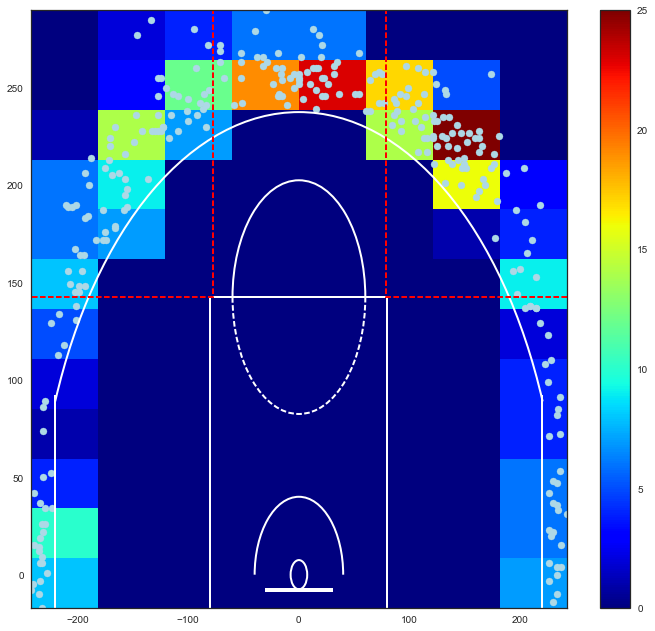

In [19]:
plt.figure(figsize=(12,11))
plt.scatter(made_shots.LOC_X, made_shots.LOC_Y, color='#add8e6')
draw_court(outer_lines=True)

plt.xlim(300,-300)
plt.ylim(-70,500)
#making heatmap
plt.hist2d(made_shots.LOC_X, made_shots.LOC_Y, (8, 12), cmap=plt.cm.jet)
plt.colorbar()

plt.show()

### Heat map for miss shots

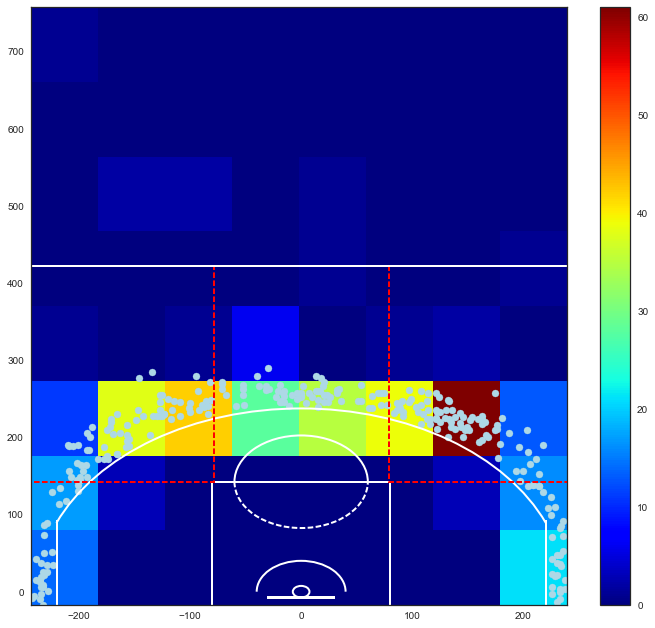

In [20]:
plt.figure(figsize=(12,11))
plt.scatter(made_shots.LOC_X, made_shots.LOC_Y, color='#add8e6')
draw_court(outer_lines=True)

plt.xlim(300,-300)
plt.ylim(-70,500)
#making heatmap
plt.hist2d(miss_shots.LOC_X, miss_shots.LOC_Y, (8, 8), cmap=plt.cm.jet)
plt.colorbar()

plt.show()

In [21]:
def get_fg_pct(shot_chart):
    with open(shot_chart) as data_file:
        shot_attempts = data_file.read()    
        
    try:
        shot_data = json.loads(shot_attempts)
    except ValueError:
        print('Failed:')
            
    headers = shot_data['resultSets'][0]['headers']

    # Get shot chart data
    shots = shot_data['resultSets'][0]['rowSet']
    df_shots = pd.DataFrame(shots, columns=headers)        
    
    threept = df_shots[df_shots['SHOT_TYPE'] == '3PT Field Goal']
    
    #find the total number for 3pts attempted
    shots_attempted = threept[threept['SHOT_ATTEMPTED_FLAG']]
    totalshots = shots_attempted.count().max()
    
    #drop the missed shots from total 3 pts attempted
    made_shots = threept[threept['EVENT_TYPE'] == 'Made Shot']
    
    #find total number of made shots
    made_attempted = made_shots[made_shots['SHOT_ATTEMPTED_FLAG']]
    totalmade = made_attempted.count().max()
    
    fgpercentage = totalmade / totalshots
    return fgpercentage * 100
    #return '{percent:.2%}'.format(percent=fgpercentage)

### Function to get the FG percentage from the Center 3 pointer

In [22]:
def get_center_pct(shot_chart):
    with open(shot_chart) as data_file:
        shot_attempts = data_file.read()    
        
    try:
        shot_data = json.loads(shot_attempts)
    except ValueError:
        print('Failed:')
            
    headers = shot_data['resultSets'][0]['headers']

    # Get shot chart data
    shots = shot_data['resultSets'][0]['rowSet']
    df_shots = pd.DataFrame(shots, columns=headers)        
    
    threept = df_shots[df_shots['SHOT_TYPE'] == '3PT Field Goal']
    
    #isolate center zone of the court
    centercolumn = threept[threept['LOC_X'] <= 79]
    center = centercolumn[centercolumn['LOC_X'] >= -79]
    
    #CENTER
    #find the total 3pt shots attempted from the center of
    #the 3pt line.
    centeratt = center[center['SHOT_ATTEMPTED_FLAG']]
    centershots = centeratt.count().max()
    
    #drop the miss shots from the total 3 pts attempted
    centermade = center[center['EVENT_TYPE'] == 'Made Shot']
    
    #find the total number of made shots from the center.
    centerattempted = centermade[centermade['SHOT_ATTEMPTED_FLAG']]
    centermade = centerattempted.count().max()
    
    #find the fg percentage from the center.
    centerpercentage = centermade / centershots
    return centerpercentage * 100
    #return '{percent:.2%}'.format(percent=centerpercentage)

### Function to get the FG percentage from the Left Wing 3 pointer

In [23]:
def get_leftwing_pct(shot_chart):
    with open(shot_chart) as data_file:
        shot_attempts = data_file.read()    
        
    try:
        shot_data = json.loads(shot_attempts)
    except ValueError:
        print('Failed:')

    headers = shot_data['resultSets'][0]['headers']

    # Get shot chart data
    shots = shot_data['resultSets'][0]['rowSet']
    df_shots = pd.DataFrame(shots, columns=headers)        
    
    threept = df_shots[df_shots['SHOT_TYPE'] == '3PT Field Goal']
    
    #isolate each zones of the court
    leftcolumn = threept[threept['LOC_X'] >= 79]
    leftwing = leftcolumn[leftcolumn['LOC_Y'] >= 142.5]
    
    #LEFT WING
    #find the total 3pt shots attempted at the right wing
    ltwingatt = leftwing[leftwing['SHOT_ATTEMPTED_FLAG']]
    ltwingshots = ltwingatt.count().max()
    
    #drop the miss shots from the total 3 pts attempted
    ltwingmade = leftwing[leftwing['EVENT_TYPE'] == 'Made Shot']
    
    #find the total number of made shots from the right wing
    ltwingattempted = ltwingmade[ltwingmade['SHOT_ATTEMPTED_FLAG']]
    ltwingmade = ltwingattempted.count().max()
    
    #find the fg percentage from the right wing
    ltwingpercentage = ltwingmade / ltwingshots
    return ltwingpercentage * 100
    #return '{percent:.2%}'.format(percent=ltwingpercentage)

### Function to get the FG percentage from the Left Wing 3 pointer

In [24]:
def get_rightwing_pct(shot_chart):
    with open(shot_chart) as data_file:
        shot_attempts = data_file.read()    
        
    try:
        shot_data = json.loads(shot_attempts)
    except ValueError:
        print('Failed:')

    headers = shot_data['resultSets'][0]['headers']

    # Get shot chart data
    shots = shot_data['resultSets'][0]['rowSet']
    df_shots = pd.DataFrame(shots, columns=headers)        
    
    threept = df_shots[df_shots['SHOT_TYPE'] == '3PT Field Goal']
    
    #isolate each zones of the court
    rightcolumn = threept[threept['LOC_X'] <= -79]
    rightwing = rightcolumn[rightcolumn['LOC_Y'] >= 142.5]
        
    #RIGHT WING
    #find the total 3pt shots attempted at the right wing
    
    rtwingatt = rightwing[rightwing['SHOT_ATTEMPTED_FLAG']]
    rtwingshots = rtwingatt.count().max()
    
    #drop the miss shots from the total 3 pts attempted
    rtwingmade = rightwing[rightwing['EVENT_TYPE'] == 'Made Shot']
    
    #find the total number of made shots from the right wing
    rtwingattempted = rtwingmade[rtwingmade['SHOT_ATTEMPTED_FLAG']]
    rtwingmade = rtwingattempted.count().max()
    
    #find the fg percentage from the right wing
    rtwingpercentage = rtwingmade / rtwingshots
    return rtwingpercentage * 100
    #return '{percent:.2%}'.format(percent=rtwingpercentage)

### Function to get the FG percentage from the Left Corner 3 pointer

In [25]:
def get_leftcorner_pct(shot_chart):
    with open(shot_chart) as data_file:
        shot_attempts = data_file.read()    
        
    try:
        shot_data = json.loads(shot_attempts)
    except ValueError:
        print('Failed:')

    headers = shot_data['resultSets'][0]['headers']

    # Get shot chart data
    shots = shot_data['resultSets'][0]['rowSet']
    df_shots = pd.DataFrame(shots, columns=headers)        
    
    threept = df_shots[df_shots['SHOT_TYPE'] == '3PT Field Goal']
    
    leftcolumn = threept[threept['LOC_X'] >= 79]
    
    leftcorner = leftcolumn[leftcolumn['LOC_Y'] <= 142.5]
    
    #LEFT corner
    #find the total 3pt shots attempted at the right wing
    ltcorneratt = leftcorner[leftcorner['SHOT_ATTEMPTED_FLAG']]
    ltcornershots = ltcorneratt.count().max()
    
    #drop the miss shots from the total 3 pts attempted
    ltcornermade = leftcorner[leftcorner['EVENT_TYPE'] == 'Made Shot']
    
    #find the total number of made shots from the right wing
    ltcornerattempted = ltcornermade[ltcornermade['SHOT_ATTEMPTED_FLAG']]
    ltcornermade = ltcornerattempted.count().max()
    
    #find the fg percentage from the right wing
    ltcornerpercentage = ltcornermade / ltcornershots
    return ltcornerpercentage * 100
    #return '{percent:.2%}'.format(percent=ltcornerpercentage)    

### Function to get the FG percentage from the Right Corner 3 pointer

In [26]:
def get_rightcorner_pct(shot_chart):
    with open(shot_chart) as data_file:
        shot_attempts = data_file.read()    
        
    try:
        shot_data = json.loads(shot_attempts)
    except ValueError:
        print('Failed:')

    headers = shot_data['resultSets'][0]['headers']

    # Get shot chart data
    shots = shot_data['resultSets'][0]['rowSet']
    df_shots = pd.DataFrame(shots, columns=headers)        
    
    threept = df_shots[df_shots['SHOT_TYPE'] == '3PT Field Goal']
    
    rightcolumn = threept[threept['LOC_X'] <= -79]
    rightcorner = rightcolumn[rightcolumn['LOC_Y'] <= 142.5]
    
    
    #RIGHT corner
    #find the total 3pt shots attempted at the right wing
    rtcorneratt = rightcorner[rightcorner['SHOT_ATTEMPTED_FLAG']]
    rtcornershots = rtcorneratt.count().max()
    
    #drop the miss shots from the total 3 pts attempted
    rtcornermade = rightcorner[rightcorner['EVENT_TYPE'] == 'Made Shot']
    
    #find the total number of made shots from the right wing
    rtcornerattempted = rtcornermade[rtcornermade['SHOT_ATTEMPTED_FLAG']]
    rtcornermade = rtcornerattempted.count().max()
    
    #find the fg percentage from the right wing
    rtcornerpercentage = rtcornermade / rtcornershots
    return rtcornerpercentage * 100
    #return '{percent:.2%}'.format(percent=rtcornerpercentage)

### Function to get the heat maps for the made field goals for the season

In [27]:
def create_charts(shot_chart):
    with open(shot_chart) as data_file:
        shot_attempts = data_file.read()    
        
        try:
            shot_data = json.loads(shot_attempts)
        except ValueError:
            print('Failed:')  
    
    headers = shot_data['resultSets'][0]['headers']

    # Get shot chart data
    shots = shot_data['resultSets'][0]['rowSet']
    df_shots = pd.DataFrame(shots, columns=headers)
    
    # Get three point FG's only
    threept = df_shots[df_shots['SHOT_TYPE'] == '3PT Field Goal']
    made_shots = threept[threept['EVENT_TYPE'] == 'Made Shot']
    
    
    # Create the graph title
    file_name = shot_chart.split(".json")
    name = ''.join(file_name)
    title_name = name[15:24] + ' Season 3PT FG Mades'    
    
    plt.figure(figsize=(12,11))
    plt.scatter(made_shots.LOC_X, made_shots.LOC_Y, color='#add8e6')
    draw_court(outer_lines=True)

    plt.xlim(300,-300)
    plt.ylim(-70,500)
    
    #making heatmap
    plt.hist2d(made_shots.LOC_X, made_shots.LOC_Y, (8, 12), cmap=plt.cm.jet)
    plt.colorbar()
    
    plt.title(title_name, fontsize=25)
    
    

    plt.show() 

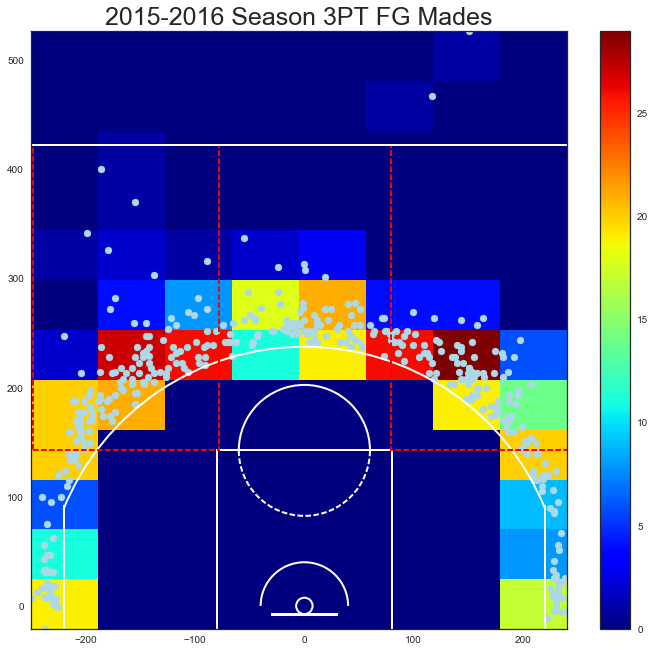

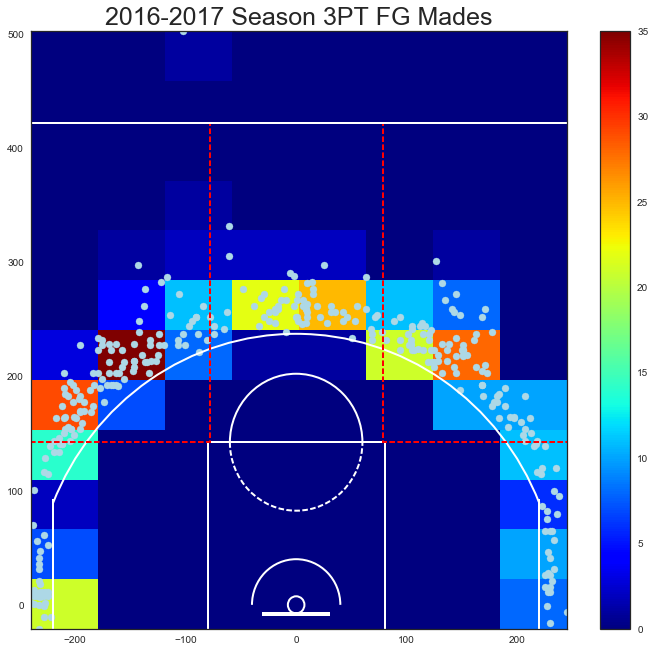

In [28]:
create_charts('shotchartdetail2015-2016.json')
create_charts('shotchartdetail2016-2017.json')

# Part 3: Data Analysis and Discussion
Now we will determine if our hypothesis was correct or not, and discuss any possible confounds/factors that may have effected our results.

## Bar chart of the percentages at each zone for the 3 years

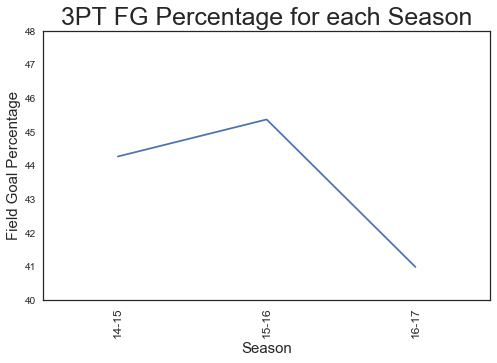

In [29]:
plt.plot([1,2,3],[get_fg_pct('shotchartdetail2014-2015.json'),get_fg_pct('shotchartdetail2015-2016.json'),get_fg_pct('shotchartdetail2016-2017.json')])
plt.xticks([1,2,3],['14-15','15-16','16-17'], rotation='vertical', fontsize = 12)
plt.margins(0.25)
plt.subplots_adjust(bottom=0.2)
plt.ylim((40,48))
plt.title('3PT FG Percentage for each Season',fontsize=25)
plt.ylabel('Field Goal Percentage', fontsize = 15)
plt.xlabel('Season', fontsize = 15)
plt.show()

In [30]:
print('The Field Goal Percentage from begind the 3pt line for the 2014-2015 season= ', (get_fg_pct('shotchartdetail2014-2015.json')))
print('The Field Goal Percentage from begind the 3pt line for the 2015-2016 season= ', (get_fg_pct('shotchartdetail2015-2016.json')))
print('The Field Goal Percentage from begind the 3pt line for the 2016-2017 season= ', (get_fg_pct('shotchartdetail2016-2017.json')))

The Field Goal Percentage from begind the 3pt line for the 2014-2015 season=  44.2724458204
The Field Goal Percentage from begind the 3pt line for the 2015-2016 season=  45.3724604966
The Field Goal Percentage from begind the 3pt line for the 2016-2017 season=  40.9898477157


## Does Stephen Curry get better with age?
ANSWER: Based upon the calculated field goal percentages from the 3 pt line over the last 3 seasons, Stephen Curry seems to get better from the first two seasons but drastically gets worst in the season 2016-2017.

However although our graph of field goal percentages say that Stephen Curry does get worst, there are many potential confounds and possible reasonings that we must take into account first. One of the possible confounds that may be the reason why Stephen Curry's field goal percentage dropped was due to the acquistion of NBA superstar, Kevin Durant. With the addition of Kevin Durant, Stephen Curry's total shot attempts may be less than his previous years, as Kevin Durant takes more shots, which will then affect Curry's field goal percentage.

Lets look at his total 3 point attempted in each of the last three seasons.


In [31]:
#lets see how much shots he attempted over the years
year15 = get_fg_pct('shotchartdetail2014-2015.json') / 100 * (totalshots/totalmade) * totalshots
year16 = get_fg_pct('shotchartdetail2015-2016.json') / 100 * (totalshots/totalmade) * totalshots
year17 = get_fg_pct('shotchartdetail2016-2017.json') / 100 * (totalshots/totalmade) * totalshots
print('Total shots for season 14-15:', year15)
print('Total shots for season 15-16:', year16)
print('Total shots for season 16-17:', year17)

Total shots for season 14-15: 646.0
Total shots for season 15-16: 662.050829532
Total shots for season 16-17: 598.102073054


# Possible reason why Stephen Curry is getting worst?

After seeing that Stephen Curry's field goal percentage took a dip in the year 2016-2017 NBA basketball season, we decided to see what were the possible reasons that may cause it. From the cell above, it shows that Stephen Curry did take less shots in the year 2016-2017 than his previous years possibly due to the addition of Kevin Durant. We determined that taking less shots in the year may affect his Field Goal percentage simply because of less shots would fluctuate his field goal percentage more. 

Although this might be a possible reasoning of why his field goal percentage taking a dip, there could be many more possible reasonings as well.

Also, although it does show his field goal percentage dropping in the year 2016-2017, we can not confidently say that it will decrease in his future years because of the fact that we only examined three seasons. Which will then lead us to another confound of having little data. If we had more time, the idea of importing more seasons and examining those as well will make our proposal and hypothesis more credible.

# Check hypothesis and analyze the field goal percentage of each zone
After figuring out if Stephen Curry was better from age, we were then interested in figuring out where he shot the best and to see if our original hypothesis was correct with him shooting better from the wings, and if so which wing in particular.

Lets go look at the percentage from each zones of the court over the last 3 seasons!

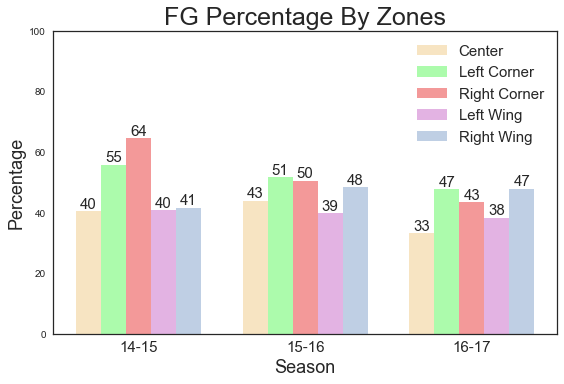

In [32]:
#data to plot
n_groups = 3

shots_center = (get_center_pct('shotchartdetail2014-2015.json'),get_center_pct('shotchartdetail2015-2016.json'),get_center_pct('shotchartdetail2016-2017.json'))
shots_left_corner = (get_leftcorner_pct('shotchartdetail2014-2015.json'),get_leftcorner_pct('shotchartdetail2015-2016.json'),get_leftcorner_pct('shotchartdetail2016-2017.json'))
shots_right_corner = (get_rightcorner_pct('shotchartdetail2014-2015.json'),get_rightcorner_pct('shotchartdetail2015-2016.json'),get_rightcorner_pct('shotchartdetail2016-2017.json'))
shots_left_wing = (get_leftwing_pct('shotchartdetail2014-2015.json'),get_leftwing_pct('shotchartdetail2015-2016.json'),get_leftwing_pct('shotchartdetail2016-2017.json'))
shots_right_wing = (get_rightwing_pct('shotchartdetail2014-2015.json'),get_rightwing_pct('shotchartdetail2015-2016.json'),get_rightwing_pct('shotchartdetail2016-2017.json'))

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8

rects1 = plt.bar(index, shots_center, bar_width,
                 alpha=opacity,
                 color='wheat',
                 label='Center')
 
rects2 = plt.bar(index + bar_width, shots_left_corner, bar_width,
                 alpha=opacity,
                 color='palegreen',
                 label='Left Corner')

rects3 = plt.bar(index + bar_width*2, shots_right_corner, bar_width,
                 alpha=opacity,
                 color='lightcoral',
                 label='Right Corner')

rects4 = plt.bar(index + bar_width*3, shots_left_wing, bar_width,
                 alpha=opacity,
                 color='plum',
                 label='Left Wing')

rects5 = plt.bar(index + bar_width*4, shots_right_wing, bar_width,
                 alpha=opacity,
                 color='lightsteelblue',
                 label='Right Wing')
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,
               '%d' % int(height),
               ha='center', va='bottom', fontsize=15)
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

plt.xticks(index + bar_width*2, ('14-15', '15-16', '16-17'), fontsize=15)
plt.title('FG Percentage By Zones',fontsize=25)
plt.xlabel("Season", fontsize=18)
plt.ylabel("Percentage", fontsize=18)
plt.ylim((0,100))
plt.legend(fontsize=15)
plt.tight_layout()

# Where is Stephen Curry most efficient on the court?
From the graph above, it seems as if Stephen Curry shoots the best and is most efficient from the right corner at a high 64 percent for the 14-15 season. Although his field goal percentage from the right corner dropped in the following seasons, his right corner field goal percentage still maintained almost as high as the other zones on the court. From this graph, we could assume that Stephen Curry is most efficient from the right corner.

##### From this answer, this proves that our original hypothesis of "Stephen Curry is most efficient from shooting from the wings" is wrong.

Although our original hypothesis was wrong, and that based on our data proves that he shoots at the highest percentage from the corner, there are possible reasons may cause this reason and that our original hypothesis may still be correct. One of the reason why Stephen Curry shot at such a high percentage from that zone could possibly be because he shot there only a few times and out of those few times he made it. To help prove this reasoning we could use the heat map that was earlier made to see which zone on the court he made the most 3 pointers. 

Lets take a look at the heat map for each season one more time!

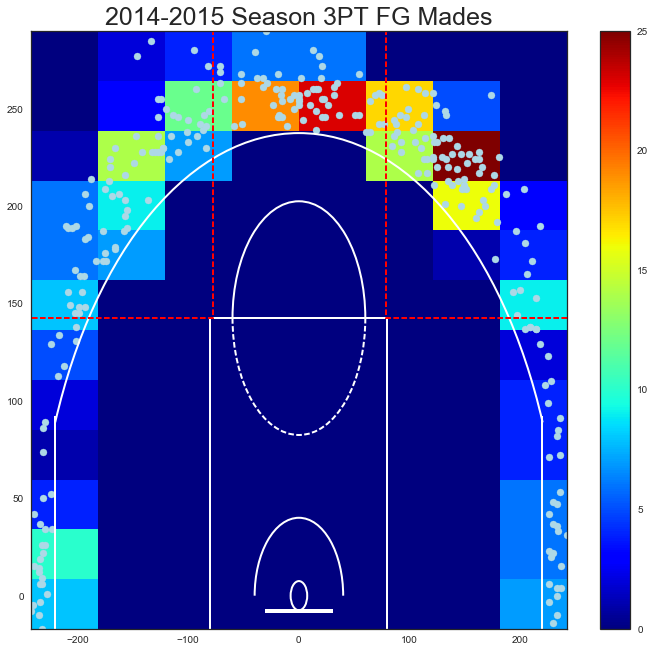

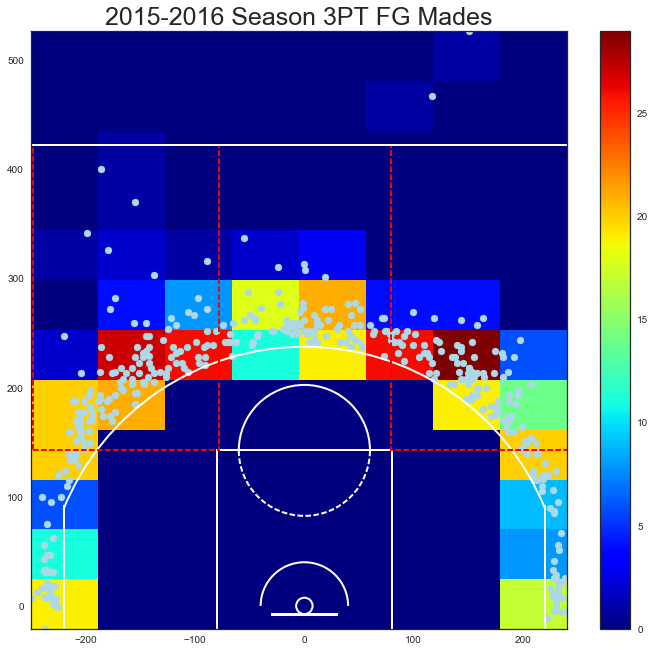

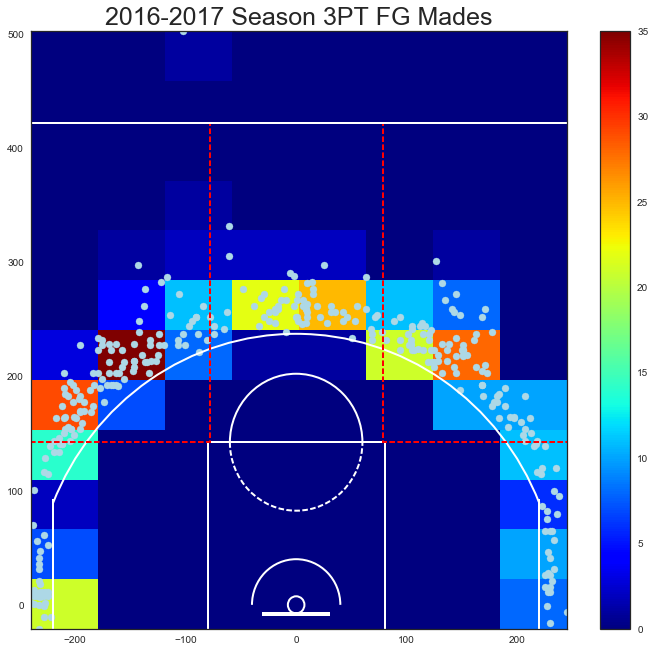

In [33]:
create_charts('shotchartdetail2014-2015.json')
create_charts('shotchartdetail2015-2016.json')
create_charts('shotchartdetail2016-2017.json')


From the heat maps above, we could then see where on the court he made the most 3 pointers.
#### In each of the heat maps for all three seasons, it looks like Stephen Curry is mainly making his three pointers from within the red box on the court that demonstrates on what is called the "wings".

Although Stephen Curry shot a high 64 percent from the right corner 3 in the year 14-15, from the heat map it seems like Stephen Curry has few made 3 pointers from that zone. Even though Stephen Curry shot a FG percentage not as high as the right corner in the year 14-15; because he makes most of his shots from the wing, we could still assume that our hypothesis of "Stephen Curry is most efficient from shooting from the wings" may very still be true. 

# The End